In [2]:
import pandas as pd
from pandas import DataFrame
from pandas import concat
from pandas import read_csv
from datetime import datetime


def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
    Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
# input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
# forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
# put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
# drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg


In [8]:
#Revision y limpieza de los datos de la estacion la flora 2010-2015.
flora2010 = pd.read_excel('1. LA FLORA.xls',sheet_name='2010 (ug-m3)', header=0)
flora2011 = pd.read_excel('1. LA FLORA.xls',sheet_name='2011 (ug-m3)', header=0)
flora2012 = pd.read_excel('1. LA FLORA.xls',sheet_name='2012 (ug-m3)', header=0)
flora2013 = pd.read_excel('1. LA FLORA.xls',sheet_name='2013 (ug-m3)', header=0)
flora2014 = pd.read_excel('1. LA FLORA.xls',sheet_name='2014 (ug-m3)', header=0)
flora2015 = pd.read_excel('1. LA FLORA.xls',sheet_name='2015 (ug-m3)', header=0)

#Unifico todos los datos en solo archivo.
floraTotal=pd.concat([flora2010,flora2011,flora2012,flora2013,flora2014,flora2015], ignore_index=True,sort=True)

floraTotal=floraTotal.rename(columns={
  "Fecha & Hora":"Fecha",
    "H2S (ug/m3)":"H2S",
  "PM10 (ug/m3)":"PM10",
    "SO2  (ug/m3)":"SO2",
    "NO2  (ug/m3)":"NO2",
    "CO  (ug/m3)":"CO",
    "O3  (ug/m3)":"O3",
    "Vel Viento  (m/s)":"VelVien",
    "Dir Viento (Grados)":"DirVien",
    "Temperatura (C°)":"Temp", 
    "Humedad (%)":"Humedad",
    "Radiacion Solar (Watt/M2)":"RSolar", 
    "Lluvia (mm)":"Lluvia" 
})


#Elimino la columnas que solo tienes nulos.
floraTotal=floraTotal.dropna(thresh=2)
# Cambio los N/A por cero
floraTotal['Fecha'].fillna(0, inplace=True)
floraTotal['H2S'].fillna(0, inplace=True)
floraTotal['PM10'].fillna(0, inplace=True)
floraTotal['SO2'].fillna(0, inplace=True)
floraTotal['NO2'].fillna(0, inplace=True)
floraTotal['CO'].fillna(0, inplace=True)
floraTotal['O3'].fillna(0, inplace=True)
floraTotal['VelVien'].fillna(0, inplace=True)
floraTotal['DirVien'].fillna(0, inplace=True)
floraTotal['Temp'].fillna(0, inplace=True)
floraTotal['Humedad'].fillna(0, inplace=True)
floraTotal['RSolar'].fillna(0, inplace=True)
floraTotal['Lluvia'].fillna(0, inplace=True)



#Defino la index del el data ser
floraTotal.index.name = 'Fecha'



In [9]:
print(floraTotal.head(5))

        CO DirVien             Fecha  H2S Humedad Lluvia  NO2        O3  PM10  \
Fecha                                                                           
3019   0.0   284.2  06/05/2010 20:00  0.0       0      0  0.0  0.000000   0.0   
3020   0.0   300.6  06/05/2010 21:00  0.0      77      0  0.0  0.000000   0.0   
3021   0.0   169.3  06/05/2010 22:00  0.0    78.2      0  0.0  5.236017   0.0   
3022   0.0   276.9  06/05/2010 23:00  0.0    81.9      0  0.0  6.016396   0.0   
3023   0.0   355.2  06/05/2010 24:00  0.0    84.3      0  0.0  4.596100   0.0   

      RSolar  SO2  Temp VelVien  
Fecha                            
3019       0  0.0     0     0.3  
3020       0  0.0  24.8     0.2  
3021       0  0.0  24.6     0.2  
3022       0  0.0    24       0  
3023       0  0.0  23.4     0.1  


In [10]:
floraTotal.to_csv('pollutionFlora.csv')

In [2]:
from pandas import read_csv
from matplotlib import pyplot
# Cargo los datos procesados.
dataset = read_csv('pollutionFlora.csv', header=0, index_col=0)
values = dataset.values


In [ ]:
# plot each column
pyplot.figure()
pyplot.plot(values[:, 1])
pyplot.title(dataset.columns[1], y=0.5, loc='right')

Text(1,0.5,'DirVien')

In [28]:
pyplot.show()

NameError: name 'pyplot' is not defined

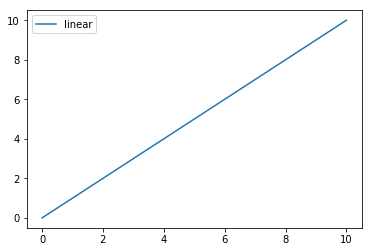

In [29]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# Prepare the data
x = np.linspace(0, 10, 100)

# Plot the data
plt.plot(x, x, label='linear')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
prin

In [5]:
print dataset.count()

SyntaxError: invalid syntax (<ipython-input-5-cf4bf84e2d9b>, line 1)

In [1]:
import pandas as pd
from pandas import DataFrame
from pandas import concat
from pandas import read_csv
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
%matplotlib inline
%matplotlib notebook

flora2010 = pd.read_excel('1. LA FLORA.xls',sheet_name='2010 (ug-m3)', header=0)

#Elimino la columnas que solo tienes nulos.
flora2010=flora2010.dropna(thresh=2)

flora2010=flora2010.rename(columns={
  "Fecha & Hora":"Fecha",
    "H2S (ug/m3)":"H2S",
  "PM10 (ug/m3)":"PM10",
    "SO2  (ug/m3)":"SO2",
    "NO2  (ug/m3)":"NO2",
    "CO  (ug/m3)":"CO",
    "O3  (ug/m3)":"O3",
    "Vel Viento  (m/s)":"VelVien",
    "Dir Viento (Grados)":"DirVien",
    "Temperatura (C°)":"Temp", 
    "Humedad (%)":"Humedad",
    "Radiacion Solar (Watt/M2)":"RSolar", 
    "Lluvia (mm)":"Lluvia" 
})

# Cambio los N/A por cero
# flora2010['Fecha'].fillna(0, inplace=True)
#flora2010['H2S'].fillna(0, inplace=True)
# flora2010['PM10'].fillna(0, inplace=True)
# flora2010['SO2'].fillna(0, inplace=True)
# flora2010['NO2'].fillna(0, inplace=True)
# flora2010['CO'].fillna(0, inplace=True)
# flora2010['O3'].fillna(0, inplace=True)
# flora2010['VelVien'].fillna(0, inplace=True)
# flora2010['DirVien'].fillna(0, inplace=True)
# flora2010['Temp'].fillna(0, inplace=True)
# flora2010['Humedad'].fillna(0, inplace=True)
# flora2010['RSolar'].fillna(0, inplace=True)
# flora2010['Lluvia'].fillna(0, inplace=True)



<IPython.core.display.Javascript object>


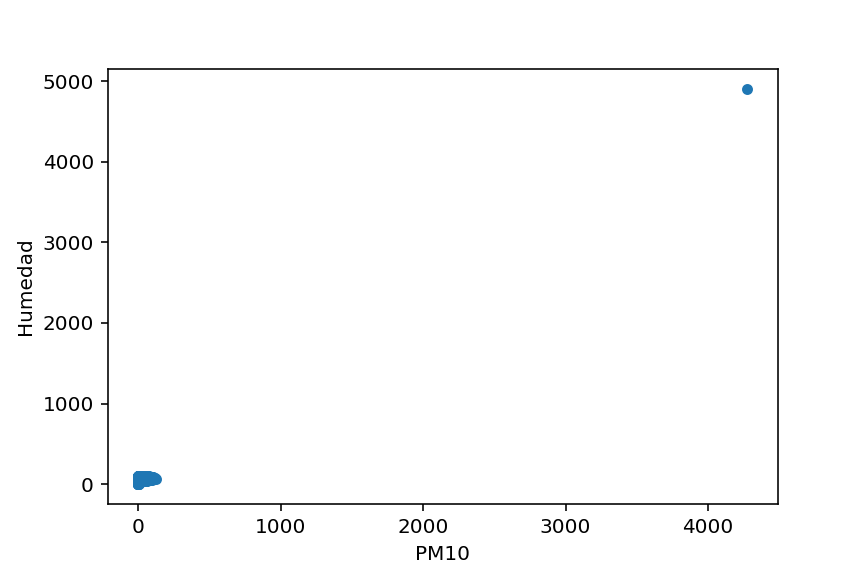

In [8]:
flora2010.plot.scatter(x='PM10',y='Humedad')
#plt.show()

In [36]:
print (flora2010.head(5))

                 Fecha  PM10  SO2  NO2   CO        O3  VelVien  DirVien  Temp  \
3019  06/05/2010 20:00   0.0  0.0  0.0  0.0  0.000000      0.3    284.2   0.0   
3020  06/05/2010 21:00   0.0  0.0  0.0  0.0  0.000000      0.2    300.6  24.8   
3021  06/05/2010 22:00   0.0  0.0  0.0  0.0  5.236017      0.2    169.3  24.6   
3022  06/05/2010 23:00   0.0  0.0  0.0  0.0  6.016396      0.0    276.9  24.0   
3023  06/05/2010 24:00   0.0  0.0  0.0  0.0  4.596100      0.1    355.2  23.4   

      Humedad  RSolar  Lluvia  
3019      0.0     0.0     0.0  
3020     77.0     0.0     0.0  
3021     78.2     0.0     0.0  
3022     81.9     0.0     0.0  
3023     84.3     0.0     0.0  


<IPython.core.display.Javascript object>


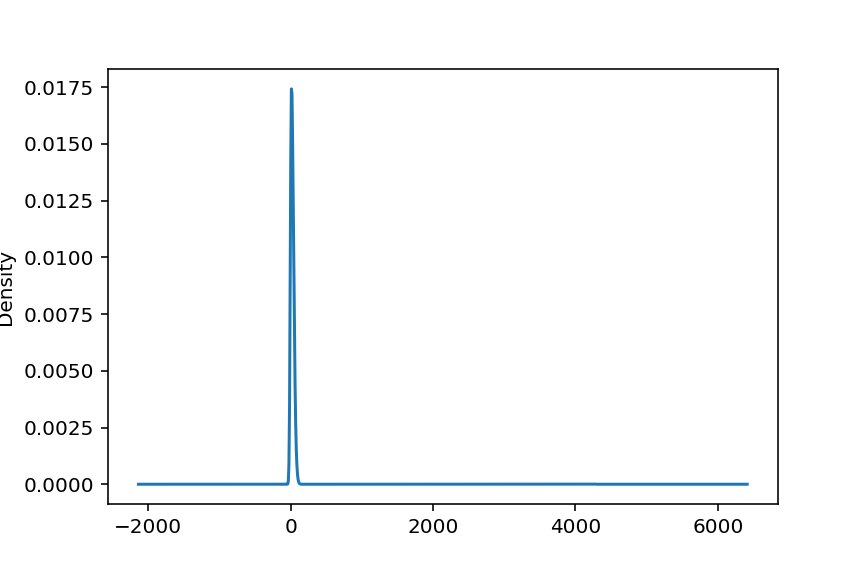

In [16]:
flora2010.PM10.plot.kde()

<IPython.core.display.Javascript object>


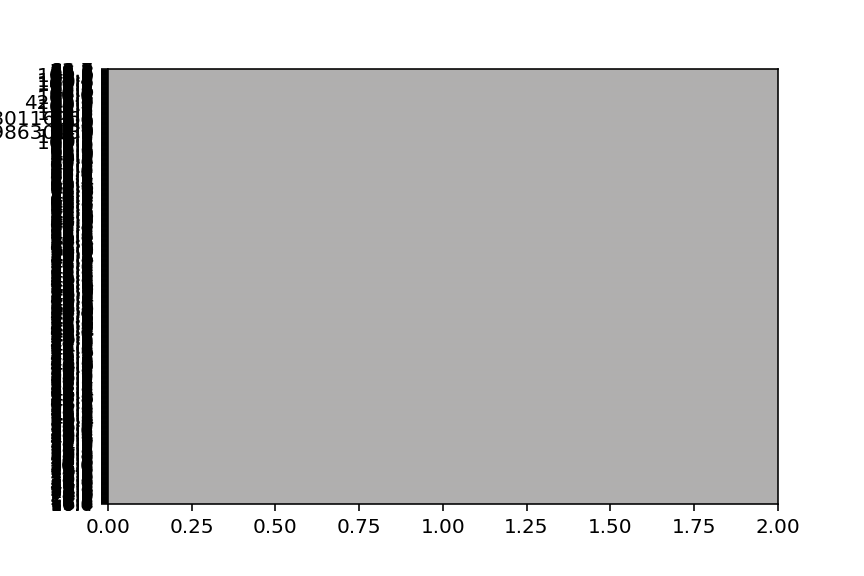

In [28]:
flora2010.DirVien.plot.hist(xlim=(0,2),bins=10)

In [23]:
stats.mode(flora2010.PM10, axis=None)

ModeResult(mode=array([0.]), count=array([637]))

In [29]:
flora2010.dtypes

Fecha       object
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
VelVien    float64
DirVien    float64
Temp       float64
Humedad    float64
RSolar     float64
Lluvia     float64
dtype: object

In [32]:
%load_ext watermark
%watermark

ModuleNotFoundError: No module named 'watermark'

In [33]:
flora2010.PM10.value_counts()

0.0      637
10.4      17
8.8       17
19.0      16
11.6      16
10.9      16
3.3       16
19.5      16
18.2      16
12.8      16
11.3      16
27.8      16
7.3       16
18.0      16
4.1       16
12.0      15
21.0      15
19.6      15
4.5       15
24.2      15
7.0       15
4.3       14
3.8       14
12.5      14
6.8       14
7.1       14
4.0       14
33.3      13
21.3      13
19.3      13
        ... 
70.1       1
65.5       1
83.1       1
97.0       1
109.0      1
102.9      1
71.9       1
64.3       1
61.5       1
0.6        1
123.4      1
84.4       1
94.4       1
84.6       1
57.6       1
96.7       1
63.9       1
60.5       1
79.0       1
109.8      1
42.5       1
79.5       1
66.5       1
80.9       1
59.5       1
58.5       1
46.8       1
79.2       1
86.7       1
63.8       1
Name: PM10, Length: 784, dtype: int64

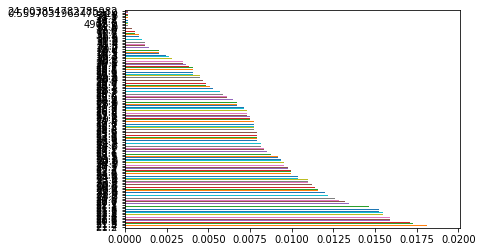

In [41]:
%matplotlib inline
flora2010.Temp.value_counts(normalize = True).plot.barh()

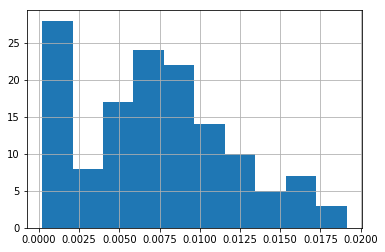

In [43]:
%matplotlib inline
flora2010.Temp.value_counts(normalize = True).hist()

In [44]:
flora2010.Temp.value_counts()

21.200000      94
21.400000      89
21.900000      85
21.500000      84
20.900000      78
21.800000      78
22.100000      78
22.800000      77
22.400000      76
22.500000      76
21.700000      75
21.600000      75
21.300000      73
21.100000      72
22.700000      71
22.200000      66
20.700000      65
22.000000      63
20.500000      62
21.000000      60
23.300000      60
22.900000      60
23.000000      59
22.600000      57
20.400000      57
26.000000      56
20.600000      56
20.800000      55
23.500000      54
25.700000      54
               ..
19.400000      13
30.300000      12
19.300000      10
19.100000      10
30.400000      10
0.000000        9
19.200000       7
31.300000       6
30.600000       6
31.400000       6
31.000000       5
30.800000       5
30.900000       5
30.500000       4
31.900000       4
31.200000       3
30.700000       3
19.000000       3
31.600000       2
32.000000       2
31.500000       1
4903.000000     1
32.100000       1
18.800000       1
32.200000 

In [2]:
n_records=len(flora2010)
def valores_nulos_col(df):
    for columna in df:
        print ("{}|{}|{}".format(
            df[columna].name, len(df[df[columna].isnull()])/(1.0*n_records),df[columna].dtype
               ))

In [3]:
valores_nulos_col(flora2010)

Fecha|0.0|object
PM10|0.12960325534079348|float64
SO2|0.05798575788402848|float64
NO2|0.19491353001017295|float64
CO|0.15808748728382502|float64
O3|0.06408952187182096|float64
VelVien|0.0018311291963377416|float64
DirVien|0.0018311291963377416|float64
Temp|0.0018311291963377416|float64
Humedad|0.0018311291963377416|float64
RSolar|0.03519837232960325|float64
Lluvia|0.002034587995930824|float64


In [9]:
from scipy import stats
import numpy as np

def outliers_col(df):
    for columna in df:
        if df[columna].dtype != np.object:
            n_outliers =len(df[np.abs(stats.zscore(df[columna]))>2])
            print ("{}|{}|{}".format(
                df[columna].name,
                n_outliers,
                df[columna].dtype
            ))

            

In [10]:
outliers_col(flora2010)

PM10|0|float64
SO2|0|float64
NO2|0|float64
CO|0|float64
O3|0|float64
VelVien|0|float64
DirVien|0|float64
Temp|0|float64
Humedad|0|float64
RSolar|0|float64
Lluvia|0|float64


/Users/cristianchaparro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


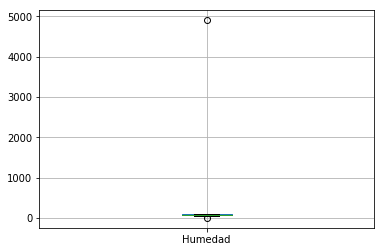

In [11]:
flora2010.boxplot(column='Humedad')

In [14]:
def unique_col_values(df):
    for column in df:
        print("{}|{}|{}".format(
            df[column].name, len(df[column].unique()),df[column].dtype
        ))

In [15]:
unique_col_values(flora2010)

Fecha|4915|object
PM10|784|float64
SO2|4467|float64
NO2|3905|float64
CO|3653|float64
O3|4426|float64
VelVien|49|float64
DirVien|2616|float64
Temp|138|float64
Humedad|571|float64
RSolar|2038|float64
Lluvia|87|float64
